In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from wordcloud.wordcloud import WordCloud

import nltk

from wrangle import wrangle_github_repos

import warnings
warnings.filterwarnings("ignore")
from matplotlib.style import use
use('~/.matplotlib/gruvbox.mplstyle')

[nltk_data] Downloading package stopwords to /Users/stray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/stray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Exploration

In [2]:
# wrangle data into prepare DataFrames
X_train, y_train, \
X_validate, y_validate, \
X_test, y_test = wrangle_github_repos()

In [3]:
X_train.head(3)

,repository,original_readme,cleaned_readme,lemmatized_readme,original_char_length,cleaned_char_length,pct_char_removed,natural_language
143,InstituteforDiseaseModeling/synthpops,# SynthPops\n\nSynthPops is a module designed ...,synthpops synthpops module designed generate s...,synthpops synthpops module designed generate s...,5324,3498,65,en
70,covid19-model/simulator,\n\n\n\n# Quantifying the Effects of Contact T...,quantifying effects contact tracing testing co...,quantifying effect contact tracing testing con...,7529,4490,59,en
180,code4romania/covid-19-ce-trebuie-sa-fac,# Ce trebuie să fac - Web platform with guides...,ce trebuie sa fac web platform guides question...,ce trebuie sa fac web platform guide questionn...,4615,1957,42,en


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 143 to 115
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   repository            127 non-null    object
 1   original_readme       127 non-null    object
 2   cleaned_readme        127 non-null    object
 3   lemmatized_readme     127 non-null    object
 4   original_char_length  127 non-null    int64 
 5   cleaned_char_length   127 non-null    int64 
 6   pct_char_removed      127 non-null    int64 
 7   natural_language      127 non-null    object
dtypes: int64(3), object(5)
memory usage: 8.9+ KB


#### Distributions

Python              56
JavaScript          27
Jupyter Notebook    19
HTML                 9
R                    8
TypeScript           8
Name: programming_language, dtype: int64


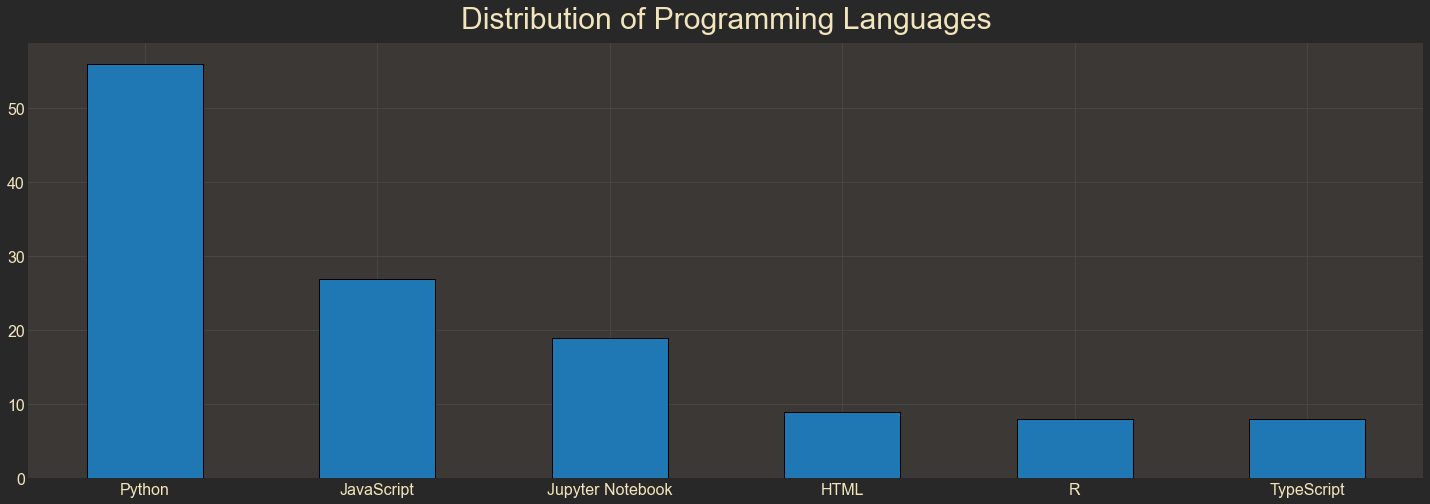

In [5]:
# view distribution of target
print(y_train.programming_language.value_counts())
# plot distribution of target
y_train.programming_language.value_counts().plot.bar(ec='k')
plt.title('Distribution of Programming Languages', fontsize=30, pad=15)
plt.xticks(rotation=0, ha='center')
plt.show()

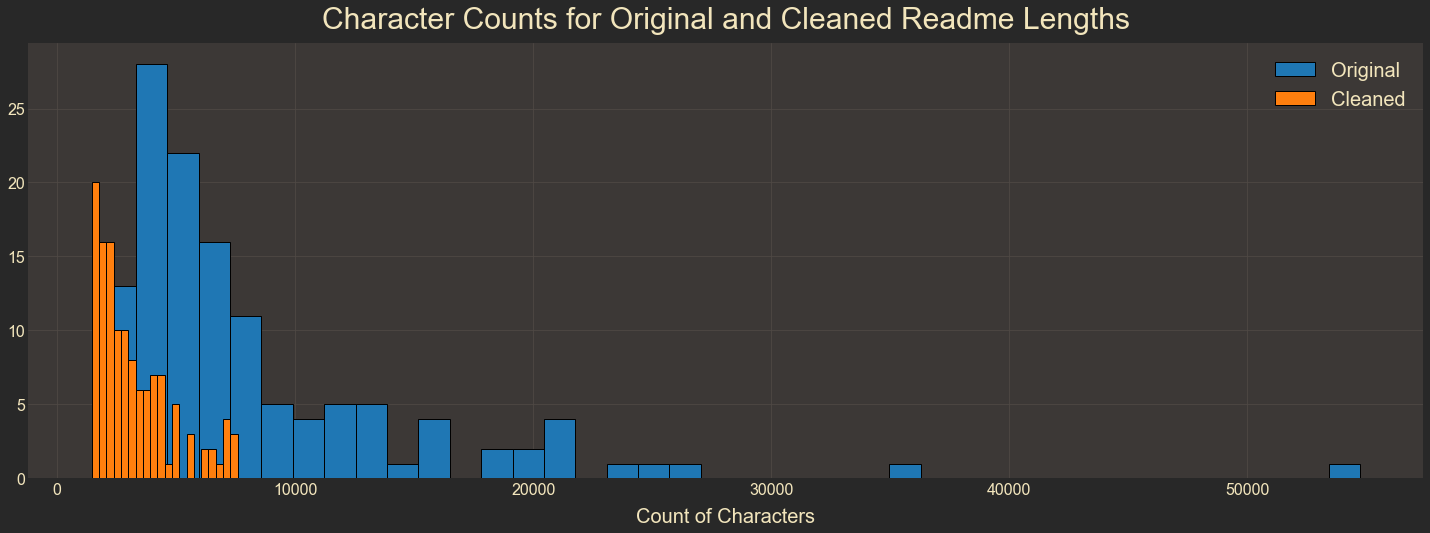

In [6]:
# plot distribution of clean and original character lengths
fig, ax = plt.subplots()
X_train.original_char_length.hist(ax=ax, bins=40, ec='k', label='Original')
X_train.cleaned_char_length.hist(ax=ax, bins=20, ec='k', label='Cleaned')
plt.title('Character Counts for Original and Cleaned Readme Lengths',
          fontsize=30, pad=15)
plt.xlabel('Count of Characters', fontsize=20, labelpad=10)
plt.legend(fontsize=20)
plt.show()

#### Single Word Frequencies

In [7]:
# create series of top 20 words across all languages
all_words = ' '.join(X_train.lemmatized_readme) .replace('\'', '')
all_lang_words = pd.Series(all_words.split())

In [8]:
# create series of words for each proggramming language
py_words = pd.Series(' '.join(X_train[y_train.programming_language == 'Python']\
                           .lemmatized_readme).replace('\'', '').split())
js_words = pd.Series(' '.join(X_train[y_train.programming_language == 'JavaScript']\
                           .lemmatized_readme).replace('\'', '').split())
jup_words = pd.Series(' '.join(X_train[y_train.programming_language == 'Jupyter Notebook']\
                           .lemmatized_readme).replace('\'', '').split())
html_words = pd.Series(' '.join(X_train[y_train.programming_language == 'HTML']\
                           .lemmatized_readme).replace('\'', '').split())
r_words = pd.Series(' '.join(X_train[y_train.programming_language == 'R']\
                           .lemmatized_readme).replace('\'', '').split())
ts_words = pd.Series(' '.join(X_train[y_train.programming_language == 'TypeScript']\
                           .lemmatized_readme).replace('\'', '').split())

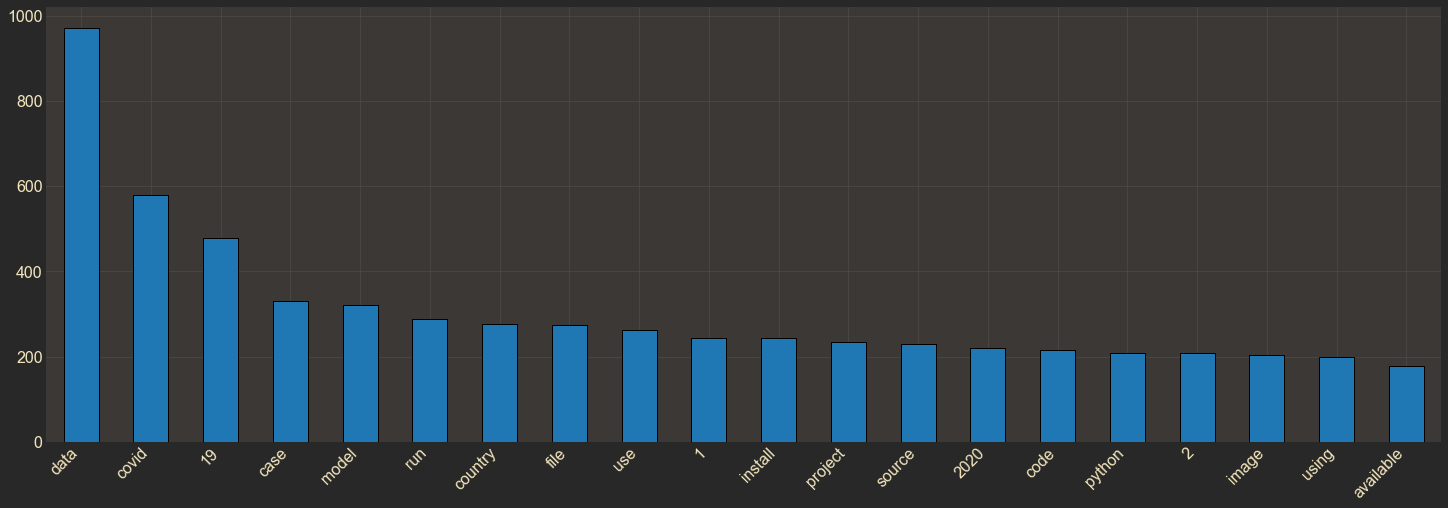

In [9]:
# visualize top 20 common words across all languages
all_words_freq = all_lang_words.value_counts().sort_values(ascending=False)
top_20_words = all_words_freq.head(20)
top_20_words.plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

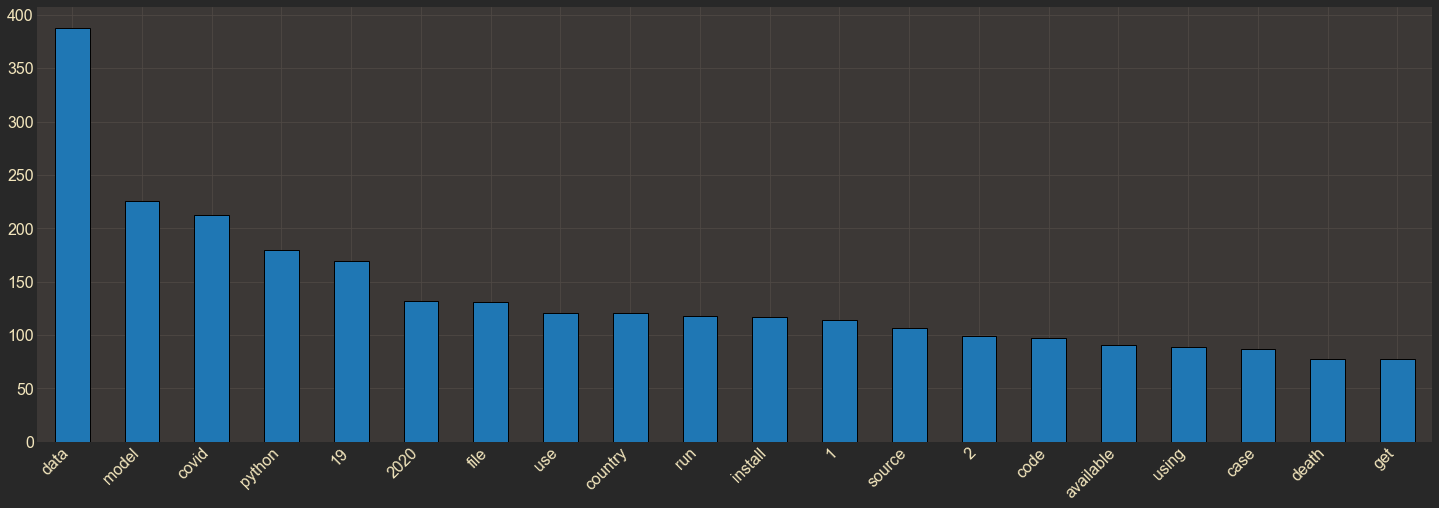

In [10]:
# visualize top 20 common words in Python
py_words_freq = py_words.value_counts().sort_values(ascending=False)
py_top_20 = py_words_freq.head(20)
py_top_20.plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

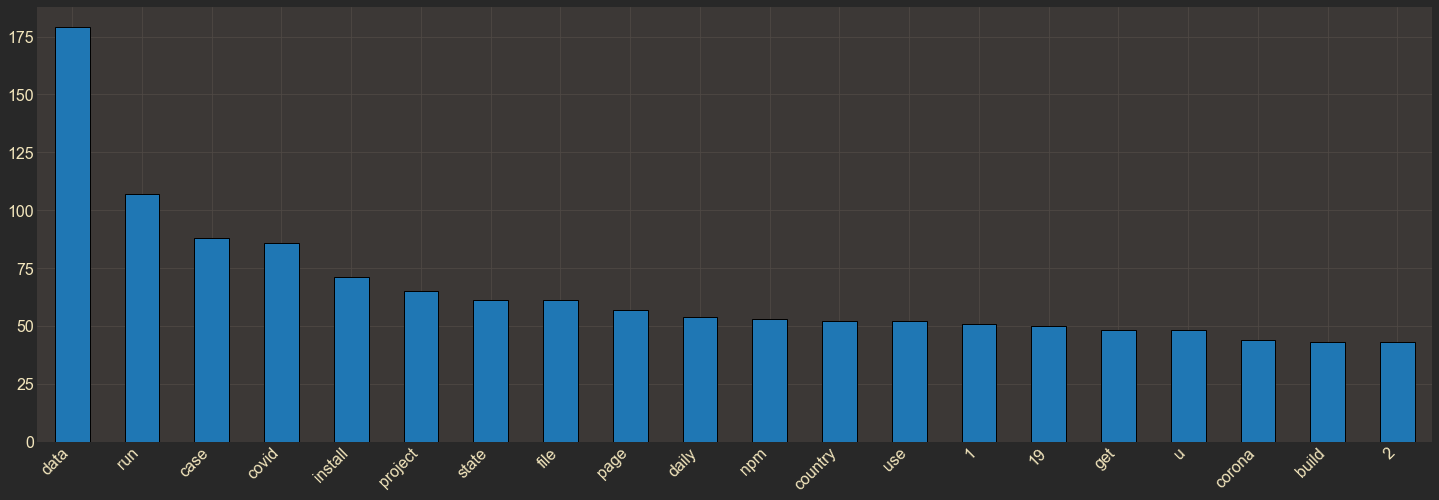

In [11]:
# visualize top 20 common words in JavaScript
js_words_freq = js_words.value_counts().sort_values(ascending=False)
js_top_20 = js_words_freq.head(20)
js_top_20.plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

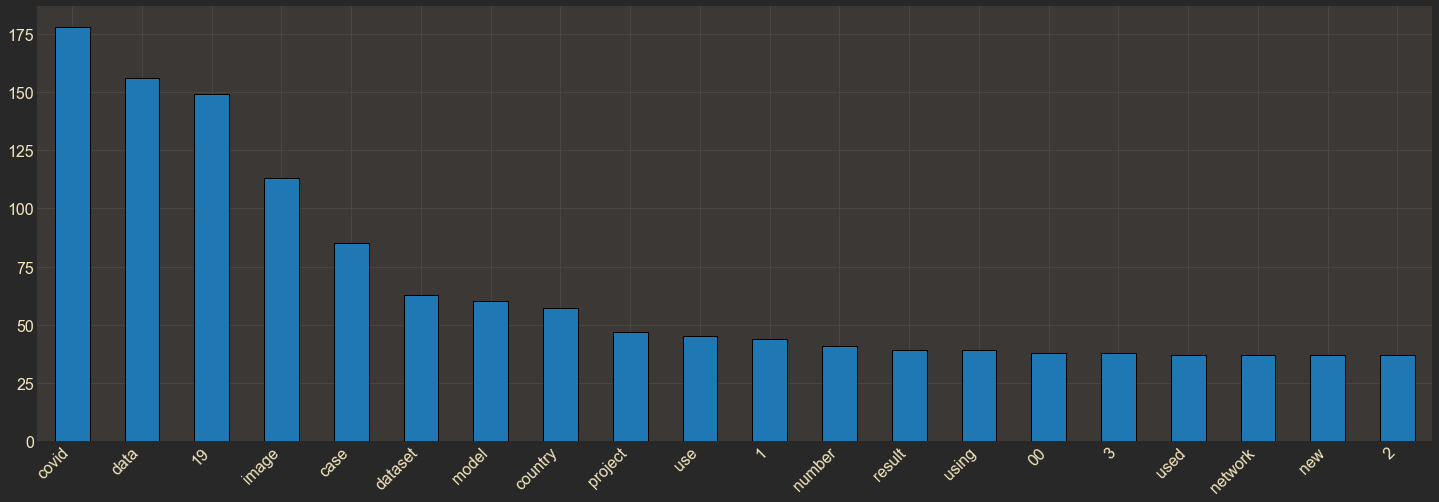

In [12]:
# visualize top 20 common words in Jupyter
jup_words_freq = jup_words.value_counts().sort_values(ascending=False)
jup_top_20 = jup_words_freq.head(20)
jup_top_20.plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

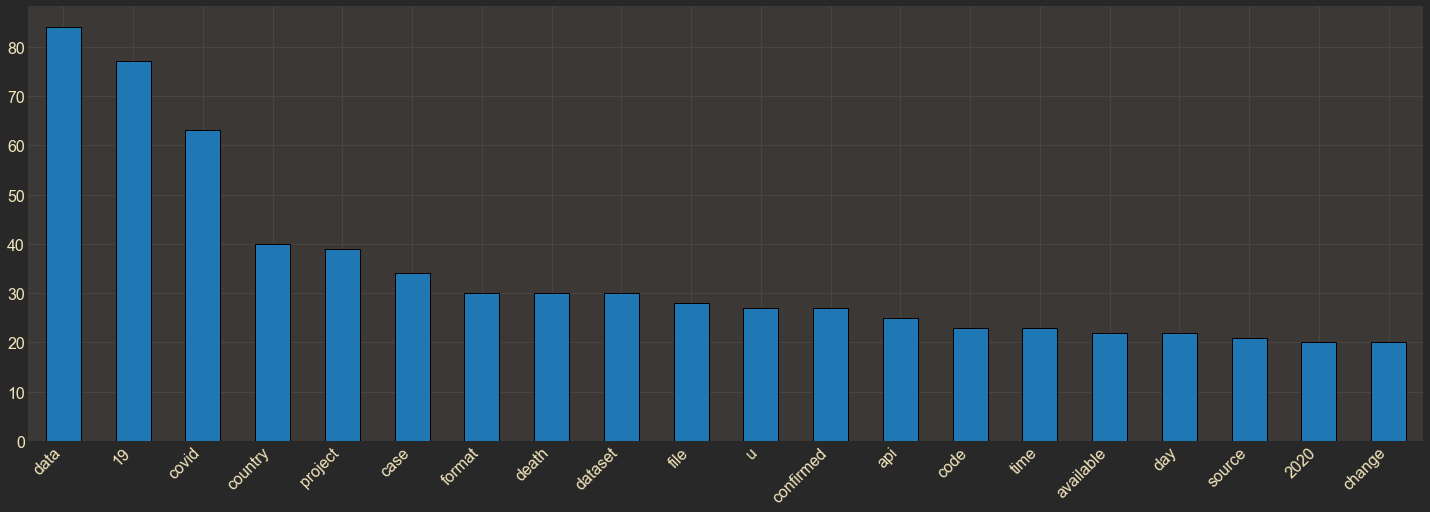

In [13]:
# visualize top 20 common words in HTML
html_words_freq = html_words.value_counts().sort_values(ascending=False)
html_top_20 = html_words_freq.head(20)
html_top_20.plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

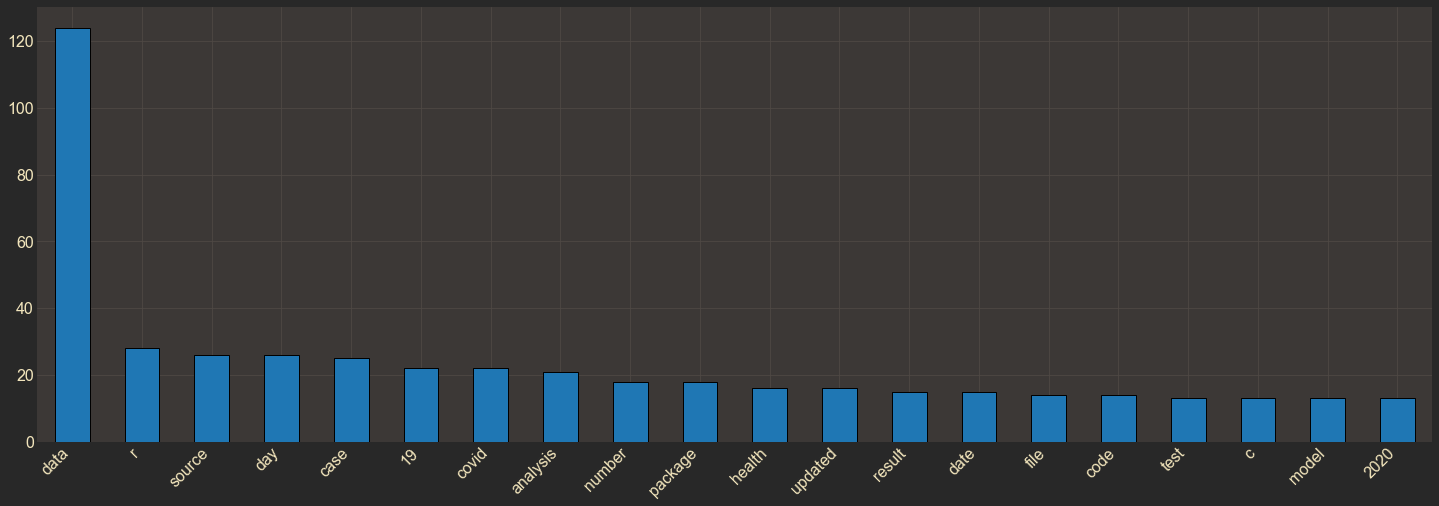

In [14]:
# visualize top 20 common words in R
r_words_freq = r_words.value_counts().sort_values(ascending=False)
r_top_20 = r_words_freq.head(20)
r_top_20.plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

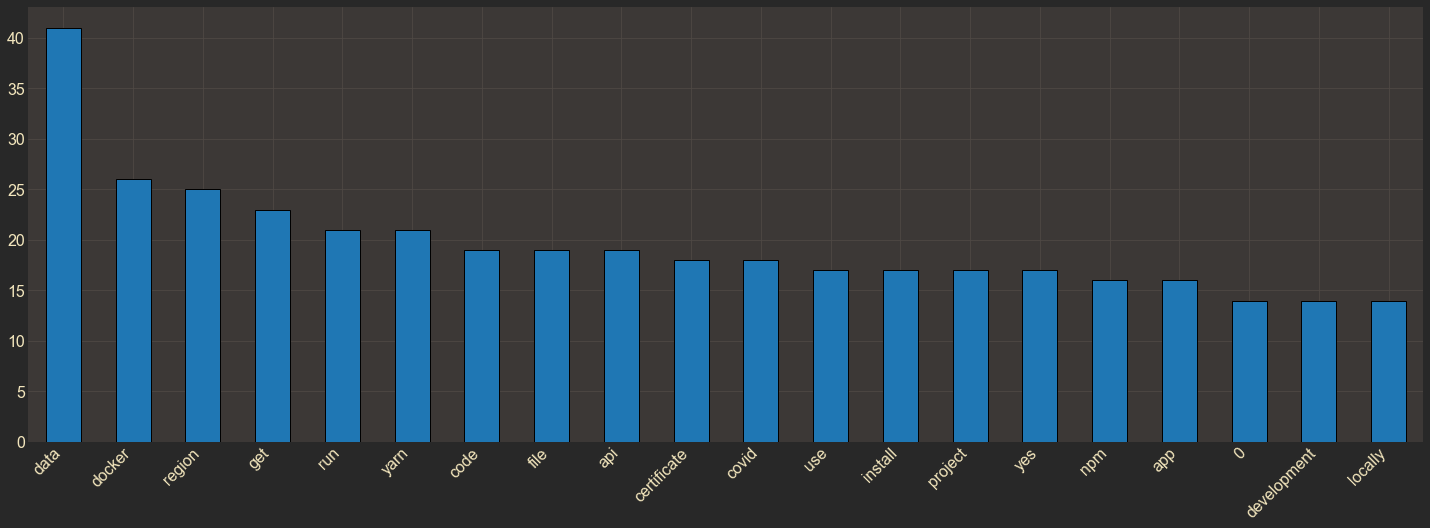

In [15]:
# visualize top 20 common words in TypeScript
ts_words_freq = ts_words.value_counts().sort_values(ascending=False)
ts_top_20 = ts_words_freq.head(20)
ts_top_20.plot.bar(ec='k')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
# create DataFrame for word freq for all and per language
word_freq = pd.concat([all_words_freq,
                       py_words_freq,
                       js_words_freq,
                       jup_words_freq,
                       html_words_freq,
                       r_words_freq,
                       ts_words_freq],
                       axis=1,
                       sort=True)\
                .set_axis(['all_words', 'py_words',
                           'js_words', 'jup_words',
                           'html_words', 'r_words',
                           'ts_words'], axis=1,
                           inplace=False)\
                .fillna(0)\
                .apply(lambda s: s.astype(int))
# subset word freq into top 20 all word frequencies
top_20_word_freq = word_freq.sort_values('all_words', ascending=False).head(20)

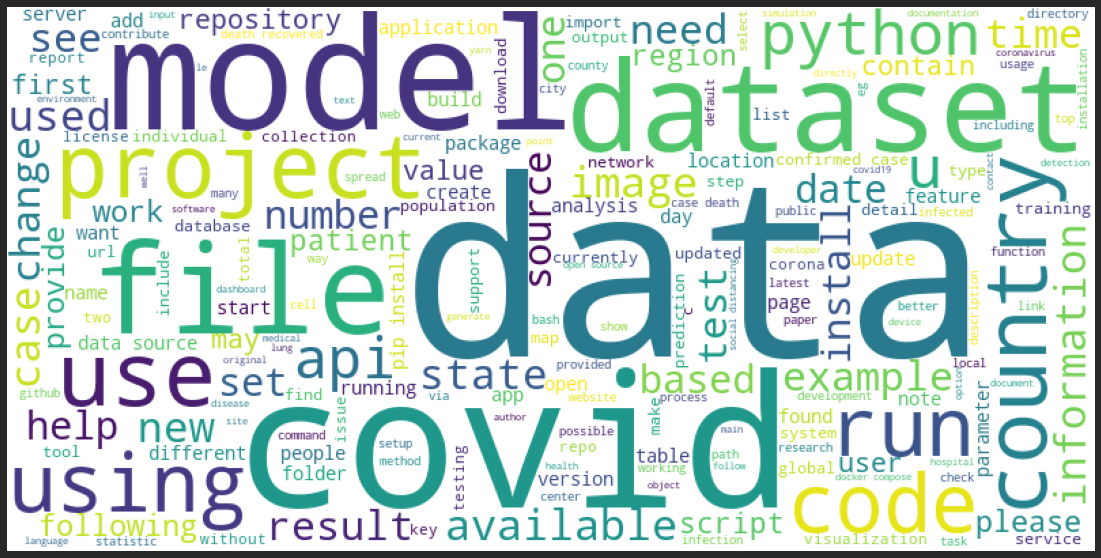

In [17]:
# visualize wordcloud of top 20 overall words
img = WordCloud(background_color='white', width=800, height=400).generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

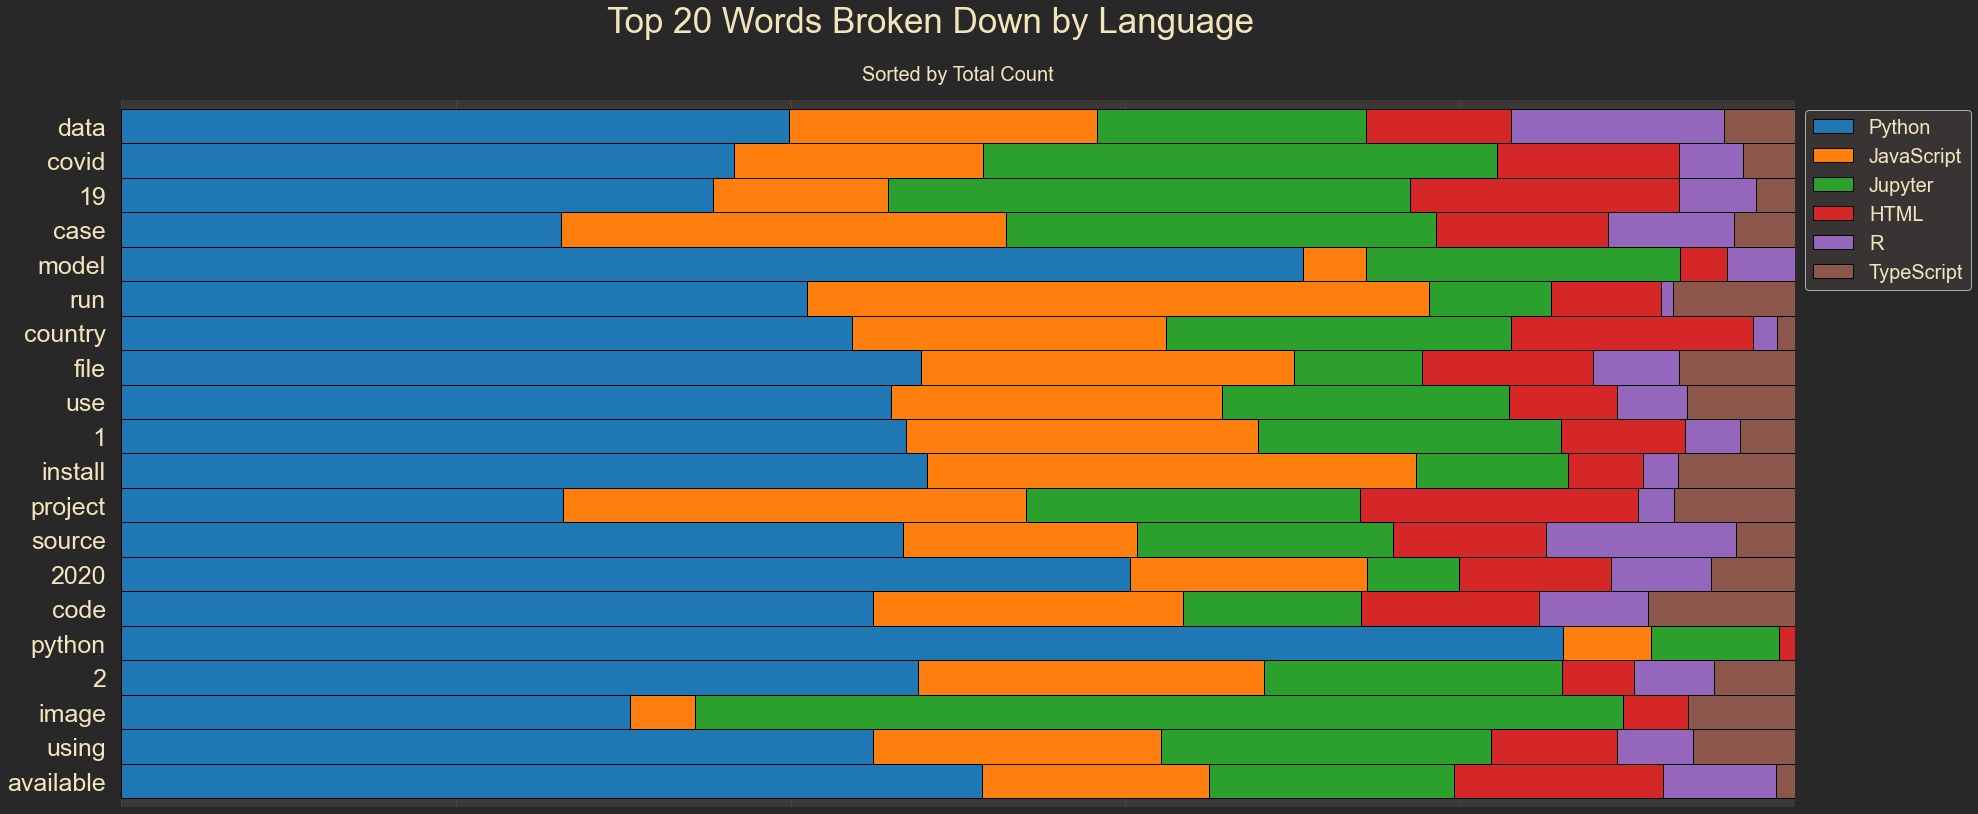

In [18]:
# visualize the percentage of each language to all words
fig, ax = plt.subplots(figsize=(30, 13))
top_20_word_freq.assign(pct_py=word_freq.py_words / word_freq.all_words,
                        pct_js=word_freq.js_words / word_freq.all_words,
                        pct_jup=word_freq.jup_words / word_freq.all_words,
                        pct_html=word_freq.html_words / word_freq.all_words,
                        pct_r=word_freq.r_words / word_freq.all_words,
                        pct_ts=word_freq.ts_words / word_freq.all_words)\
    .sort_values(by='all_words')\
    [['pct_py', 'pct_js', 'pct_jup', 'pct_html', 'pct_r', 'pct_ts']]\
    .plot.barh(stacked=True, ec='k', width=1, ax=ax)
ax.set_xlim(xmax=1)
ax.tick_params(axis='y', labelsize=25, pad=15)
plt.tick_params(axis='x', labelbottom=False)
ax.legend(labels=['Python', 'JavaScript', 'Jupyter', 'HTML', 'R', 'TypeScript'],
          bbox_to_anchor=(1,1), fontsize=20, frameon=True)
plt.suptitle('Top 20 Words Broken Down by Language', fontsize=35)
plt.title('Sorted by Total Count', fontsize=20, pad=20)
plt.show()

In [19]:
# view which if any top 20 words are missing from languages


# top 20 words present in python readme
py_in_20 = top_20_words[top_20_words.index.isin(py_words)]
print(f'Python is missing {20 -len(py_in_20)} words: {list(set(top_20_words.index).difference(set(py_in_20.index)))}')
# top 20 words present in javascript readme
js_in_20 = top_20_words[top_20_words.index.isin(js_words)]
print(f'JavaScript is missing {20 -len(js_in_20)} words: {list(set(top_20_words.index).difference(set(js_in_20.index)))}')
# top 20 words present in jupyter readme
jup_in_20 = top_20_words[top_20_words.index.isin(jup_words)]
print(f'Jupyter is missing {20 -len(jup_in_20)} words: {list(set(top_20_words.index).difference(set(jup_in_20.index)))}')
# top 20 words present in html readme
html_in_20 = top_20_words[top_20_words.index.isin(html_words)]
print(f'HTML is missing {20 -len(html_in_20)} words: {list(set(top_20_words.index).difference(set(html_in_20.index)))}')
# top 20 words present in r readme
r_in_20 = top_20_words[top_20_words.index.isin(r_words)]
print(f'R is missing {20 -len(r_in_20)} words: {list(set(top_20_words.index).difference(set(r_in_20.index)))}')
# top 20 words present in typescript readme
ts_in_20 = top_20_words[top_20_words.index.isin(ts_words)]
print(f'Typescript is missing {20 -len(ts_in_20)} words: {list(set(top_20_words.index).difference(set(ts_in_20.index)))}')

Python is missing 0 words: []
JavaScript is missing 0 words: []
Jupyter is missing 0 words: []
HTML is missing 0 words: []
R is missing 2 words: ['python', 'image']
Typescript is missing 2 words: ['python', 'model']


In [20]:
# view which do not contain a top 20 in respective top 20

# python top 20 in total top 20
py_20_in_20 = top_20_words[top_20_words.index.isin(py_words.value_counts().sort_values().tail(20).index)]
print(f'Python is missing {20 -len(py_20_in_20)} words: {list(set(top_20_words.index).difference(set(py_20_in_20.index)))}')
# javescript top 20 in total top 20
js_20_in_20 = top_20_words[top_20_words.index.isin(js_words.value_counts().sort_values().tail(20).index)]
print(f'JavaScript is missing {20 -len(js_20_in_20)} words: {list(set(top_20_words.index).difference(set(js_20_in_20.index)))}')
# jupyter top 20 in total top 20
jup_20_in_20 = top_20_words[top_20_words.index.isin(jup_words.value_counts().sort_values().tail(20).index)]
print(f'Jupyter is missing {20 -len(jup_20_in_20)} words: {list(set(top_20_words.index).difference(set(jup_20_in_20.index)))}')
# html top 20 in total top 20
html_20_in_20 = top_20_words[top_20_words.index.isin(html_words.value_counts().sort_values().tail(20).index)]
print(f'HTML is missing {20 -len(html_20_in_20)} words: {list(set(top_20_words.index).difference(set(html_20_in_20.index)))}')
# r top 20 in total top 20
r_20_in_20 = top_20_words[top_20_words.index.isin(r_words.value_counts().sort_values().tail(20).index)]
print(f'R is missing {20 -len(r_20_in_20)} words: {list(set(top_20_words.index).difference(set(r_20_in_20.index)))}')
# typescript top 20 in total top 20
ts_20_in_20 = top_20_words[top_20_words.index.isin(ts_words.value_counts().sort_values().tail(20).index)]
print(f'Typescript is missing {20 -len(ts_20_in_20)} words: {list(set(top_20_words.index).difference(set(ts_20_in_20.index)))}')

Python is missing 2 words: ['image', 'project']
JavaScript is missing 8 words: ['code', 'using', 'python', 'source', 'image', 'available', '2020', 'model']
Jupyter is missing 8 words: ['code', 'install', 'python', 'source', 'run', 'available', '2020', 'file']
HTML is missing 9 words: ['1', 'install', 'use', 'using', 'python', 'image', '2', 'run', 'model']
R is missing 11 words: ['1', 'country', 'using', 'install', 'use', 'python', 'image', '2', 'run', 'available', 'project']
Typescript is missing 12 words: ['1', 'country', 'case', '19', 'using', 'python', 'source', 'image', '2', 'available', '2020', 'model']


#### Takeaways

Viewing the single word frequency for both the sum of and individual languages does not provide a particularly strong insight into using natural language to determine the programming language for the repository contents. The majority, if not all, of the top $20$ most frequent words are present in the `readme` contents for all languages, and the top $20$ compared with individual languages respective top $20$ trends down with less common target classes. There may be something there, but the preceding fact casts doubt on a definitive takeaway.

#### Bi-gram Frequencies

In [21]:
# create bigram freq series for all words and each language

# create series for all bigrams and frequency of
all_bigrams = pd.Series(nltk.bigrams(all_lang_words))
all_bigram_freq = all_bigrams.value_counts().sort_values(ascending=False)
top_20_bigrams = all_bigram_freq.head(20)
# create series for python bigrams and frequency of
py_bigrams = pd.Series(nltk.bigrams(py_words))
py_bigram_freq= py_bigrams.value_counts().sort_values(ascending=False)
# create series for javascript bigrams and frequency of
js_bigrams = pd.Series(nltk.bigrams(js_words))
js_bigram_freq = js_bigrams.value_counts().sort_values(ascending=False)
# create series for jupyter bigrams and frequency of
jup_bigrams = pd.Series(nltk.bigrams(jup_words))
jup_bigram_freq = jup_bigrams.value_counts().sort_values(ascending=False)
# create series for html bigrams and frequency of
html_bigrams = pd.Series(nltk.bigrams(html_words))
html_bigram_freq = html_bigrams.value_counts().sort_values(ascending=False)
# create series for r bigrams and frequency of
r_bigrams = pd.Series(nltk.bigrams(r_words))
r_bigram_freq = r_bigrams.value_counts().sort_values(ascending=False)
# create series for typescript bigrams and frequency of
ts_bigrams = pd.Series(nltk.bigrams(ts_words))
ts_bigram_freq = ts_bigrams.value_counts().sort_values(ascending=False)

In [22]:
# create DataFrame for bigram freq for all and per language
bigram_freq = pd.concat([all_bigram_freq,
                        py_bigram_freq,
                        js_bigram_freq,
                        jup_bigram_freq,
                        html_bigram_freq,
                        r_bigram_freq,
                        ts_bigram_freq],
                        axis=1,
                        sort=True)\
                .set_axis(['all_bigrams', 'py_bigrams',
                           'js_bigrams', 'jup_bigrams',
                           'html_bigrams', 'r_bigrams',
                           'ts_bigrams'], axis=1,
                           inplace=False)\
                .fillna(0)\
                .apply(lambda s: s.astype(int))
# subset word freq into top 20 all bigram frequencies
top_20_bigram_freq = bigram_freq.sort_values('all_bigrams', ascending=False).head(20)

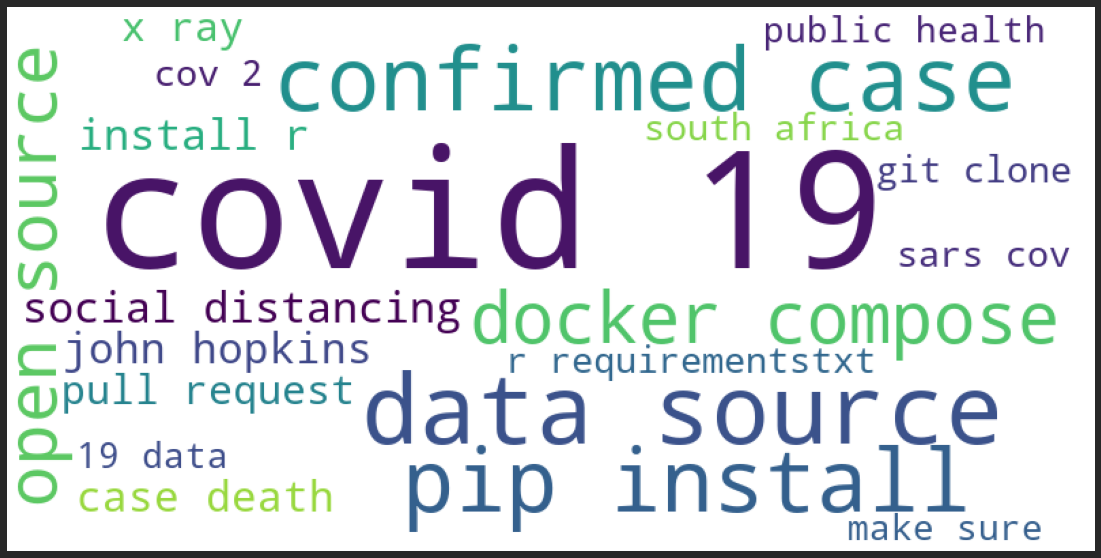

In [23]:
# visualize wordcloud of top 20 overall bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
loc

NameError: name 'loc' is not defined

In [ ]:
# visualize the percentage of each language to all bigrams
fig, ax = plt.subplots(figsize=(30, 13))
top_20_bigram_freq.assign(pct_py=bigram_freq.py_bigrams / bigram_freq.all_bigrams,
                        pct_js=bigram_freq.js_bigrams / bigram_freq.all_bigrams,
                        pct_jup=bigram_freq.jup_bigrams / bigram_freq.all_bigrams,
                        pct_html=bigram_freq.html_bigrams / bigram_freq.all_bigrams,
                        pct_r=bigram_freq.r_bigrams / bigram_freq.all_bigrams,
                        pct_ts=bigram_freq.ts_bigrams / bigram_freq.all_bigrams)\
    .sort_values(by='all_bigrams')\
    [['pct_py', 'pct_js', 'pct_jup', 'pct_html', 'pct_r', 'pct_ts']]\
    .plot.barh(stacked=True, ec='k', width=1, ax=ax)
ax.set_xlim(xmax=1)
ax.tick_params(axis='y', labelsize=25, pad=15)
plt.tick_params(axis='x', labelbottom=False)
ax.legend(labels=['Python', 'JavaScript', 'Jupyter', 'HTML', 'R', 'TypeScript'],
          bbox_to_anchor=(1,1), fontsize=20, frameon=True)
plt.suptitle('Top 20 Bigrams Broken Down by Language', fontsize=35)
plt.title('Sorted by Total Count', fontsize=20, pad=20)
plt.show()

In [ ]:
# view which if any top 20 bigrams are missing from languages


# top 20 bigrams present in python readme
py_in_20 = top_20_bigrams[top_20_bigrams.index.isin(py_bigrams)]
print(f'Python is missing {20 -len(py_in_20)} bigram(s): {list(set(top_20_bigrams.index).difference(set(py_in_20.index)))}')
# top 20 bigrams present in javascript readme
js_in_20 = top_20_bigrams[top_20_bigrams.index.isin(js_bigrams)]
print(f'JavaScript is missing {20 -len(js_in_20)} bigram(s): {list(set(top_20_bigrams.index).difference(set(js_in_20.index)))}')
# top 20 words present in jupyter readme
jup_in_20 = top_20_bigrams[top_20_bigrams.index.isin(jup_bigrams)]
print(f'Jupyter is missing {20 -len(jup_in_20)} bigram(s): {list(set(top_20_bigrams.index).difference(set(jup_in_20.index)))}')
# top 20 words present in html readme
html_in_20 = top_20_bigrams[top_20_bigrams.index.isin(html_bigrams)]
print(f'HTML is missing {20 -len(html_in_20)} bigram(s): {list(set(top_20_bigrams.index).difference(set(html_in_20.index)))}')
# top 20 words present in r readme
r_in_20 = top_20_bigrams[top_20_bigrams.index.isin(r_bigrams)]
print(f'R is missing {20 -len(r_in_20)} bigram(s): {list(set(top_20_bigrams.index).difference(set(r_in_20.index)))}')
# top 20 words present in typescript readme
ts_in_20 = top_20_bigrams[top_20_bigrams.index.isin(ts_bigrams)]
print(f'Typescript is missing {20 -len(ts_in_20)} bigram(s): {list(set(top_20_bigrams.index).difference(set(ts_in_20.index)))}')